In [2]:
import pywt
import scipy.stats
import scipy.signal
import scipy.io

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from .kpnet.handler import *
from .kpnet.network import *
from .kpnet.signal import *
from .kpnet.callback import *
from .kpnet.analysis import *
from .kpnet.patterns import *

from wavelets import *

SystemError: Parent module '' not loaded, cannot perform relative import

In [3]:
neurons = 64
time_interval = 100000

In [11]:
np.random.seed(6)
neuron = 5
net = KPNetworkDelayed(neurons, 3, alpha=0.1, beta=1.5)

callbacks = {}
callbacks['N_' + str(neuron)] = NeuronActivityCallback(time_interval, neuron)

for i in range(neurons):
    callbacks['W_' + str(i)] = Weight0Callback(time_interval, neuron, i)

#for i in range(7):
#    callbacks['Trace_' + str(i)] = TraceCallback(time_interval, 300, i)
    
signal = SwitchSignal([200, time_interval], [RandomUnitSignal(neurons), ZeroSignal(neurons)])
handler = ComputationHandler(time_interval)
%time results = handler.run(net, signal, callbacks)

CPU times: user 21.9 s, sys: 48 ms, total: 22 s
Wall time: 22 s


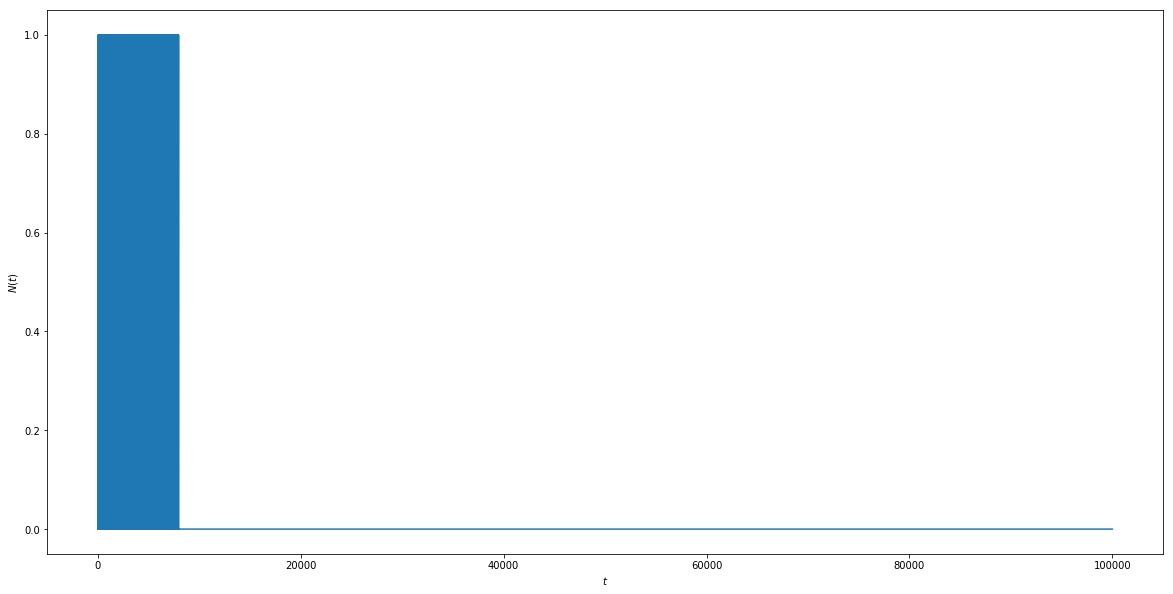

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(results['N_5'])
plt.ylabel(r'$N(t)$')
plt.xlabel(r'$t$')
plt.show()

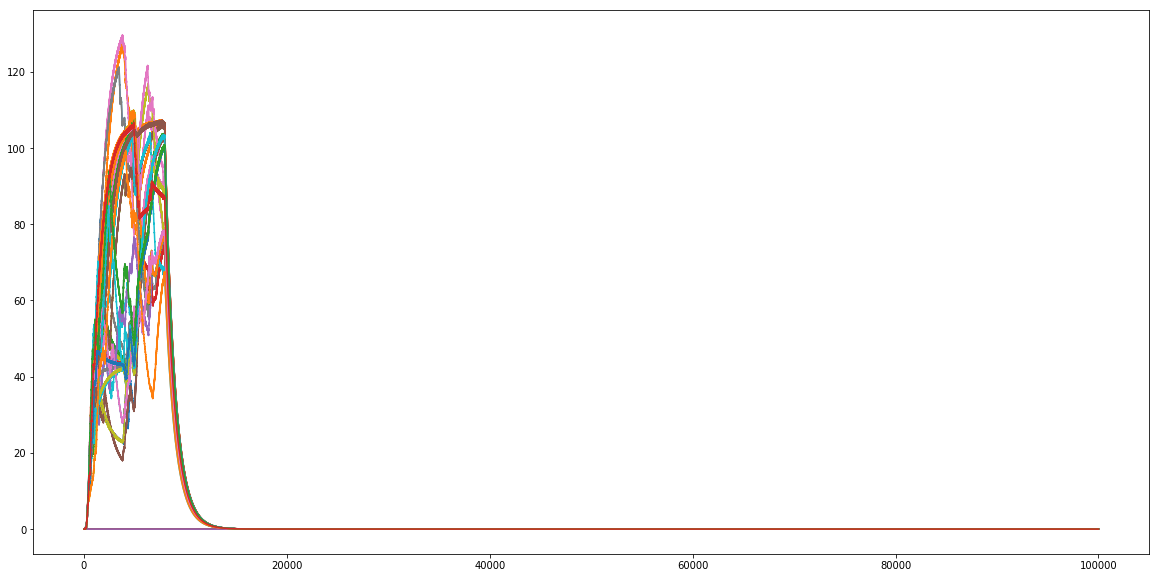

In [13]:
plt.figure(figsize=(20, 10))
for i in range(neurons):
    plt.plot(results['W_' + str(i)])
plt.show()

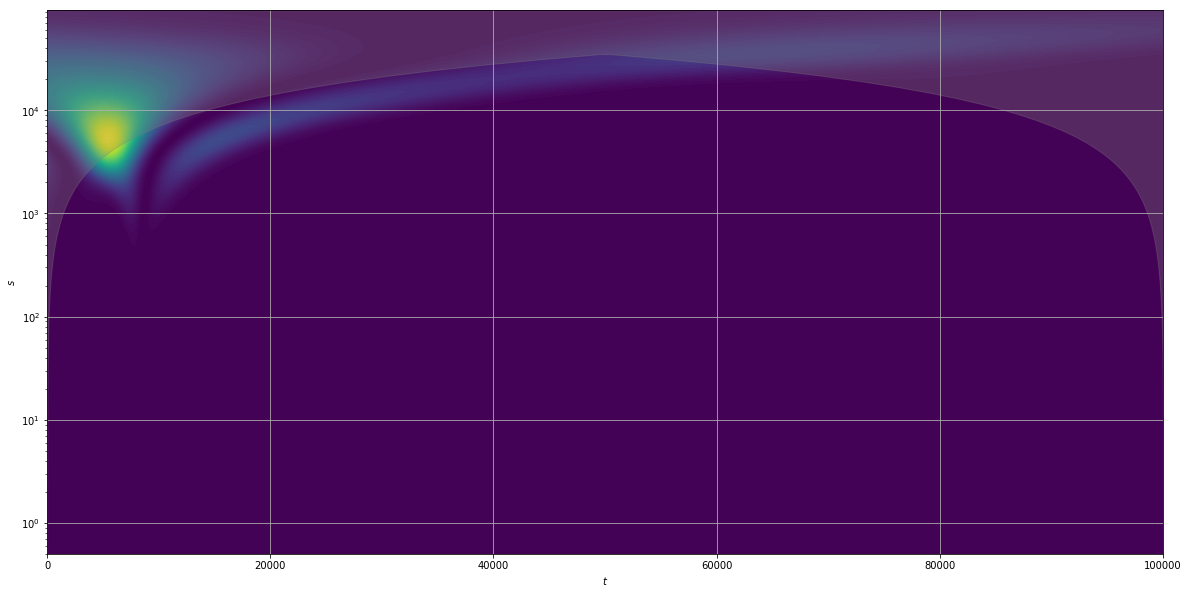

In [14]:
wa = WaveletAnalysis(results['W_2'], wavelet=Ricker())
fig = plt.figure(figsize=(20, 10)) 
ax = plt.subplot()
wa.plot_power(ax)
plt.xlabel(r'$t$')
plt.ylabel(r'$s$')
plt.show()

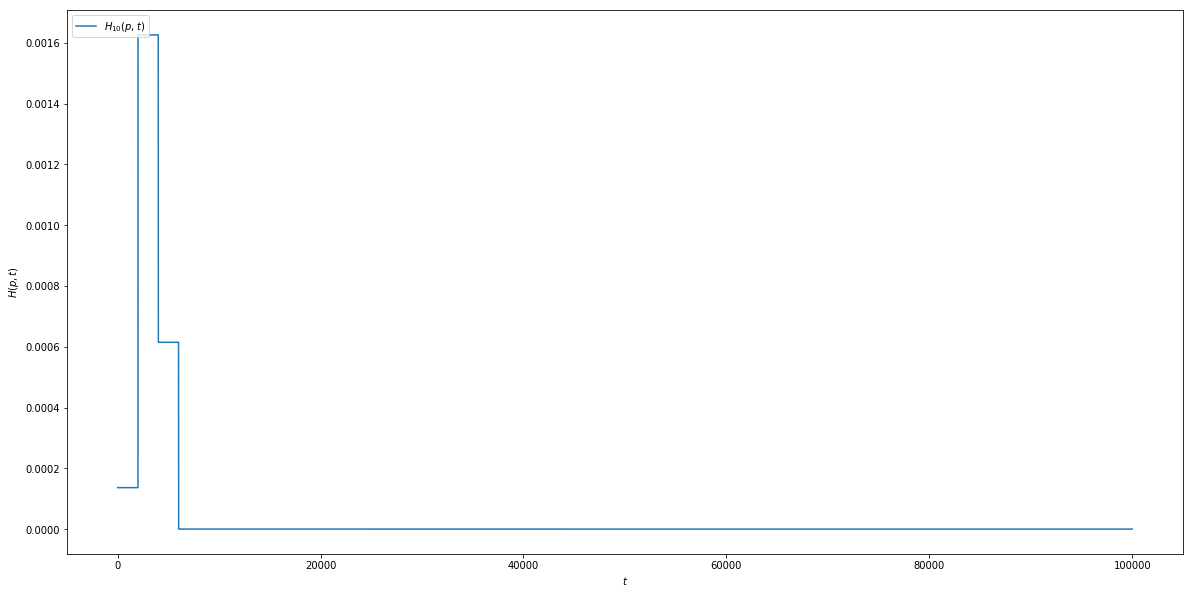

In [15]:
fig = plt.figure(figsize=(20, 10))
div = wdivergence_d(results['W_2'], results['W_3'], 2000, 'db2')
plt.plot(div, label='$H_{10}(p, t)$')
plt.xlabel(r'$t$')
plt.ylabel(r'$H(p, t)$')
plt.legend(loc='upper left')
plt.show()

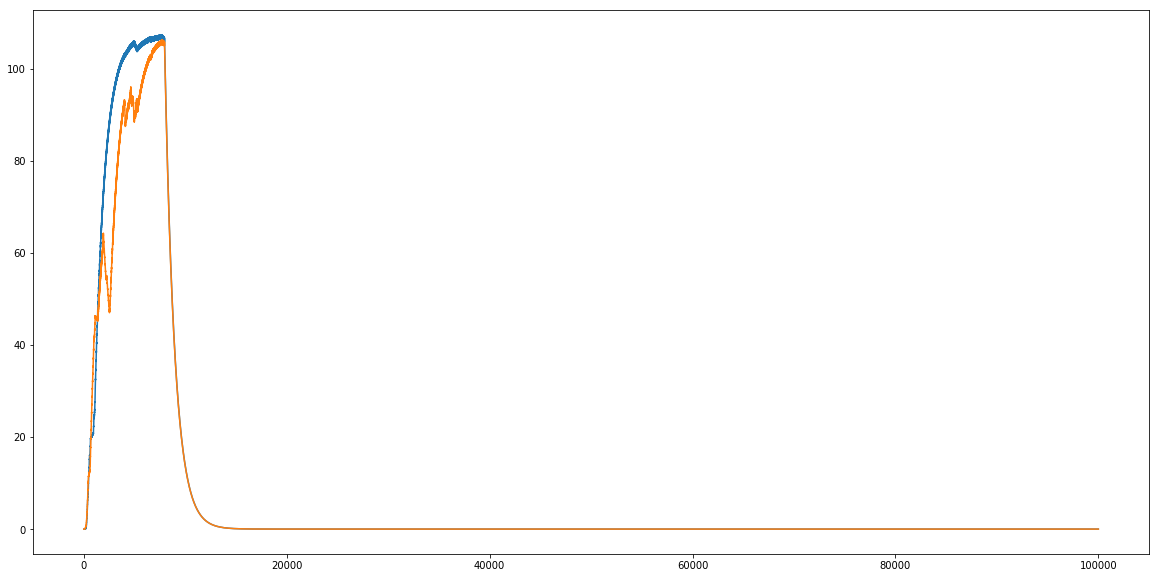

In [16]:
plt.figure(figsize=(20, 10))
#for i in range(1, 3):
plt.plot(results['W_' + str(3)])
plt.plot(results['W_' + str(2)])
plt.show()